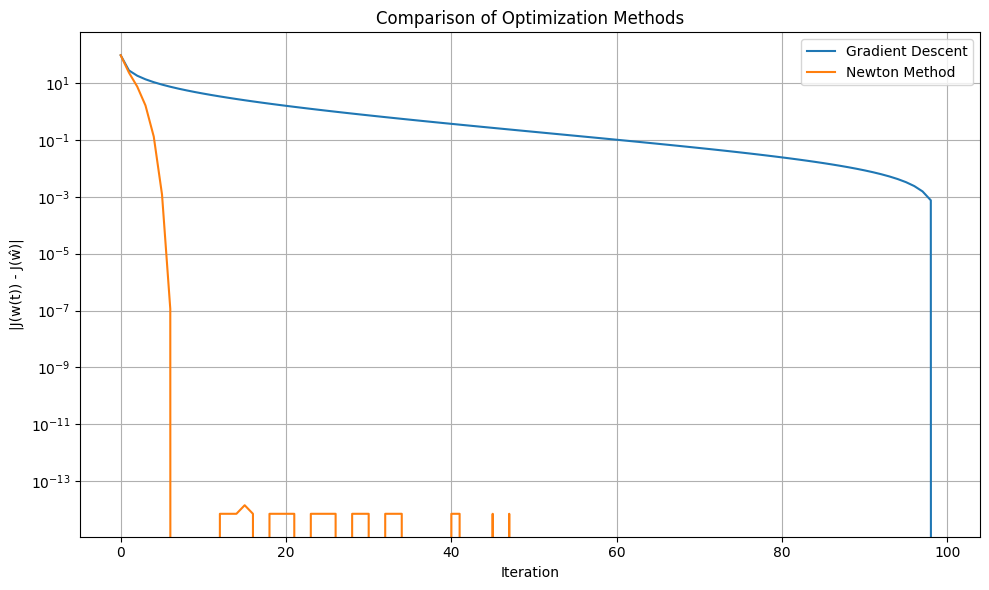

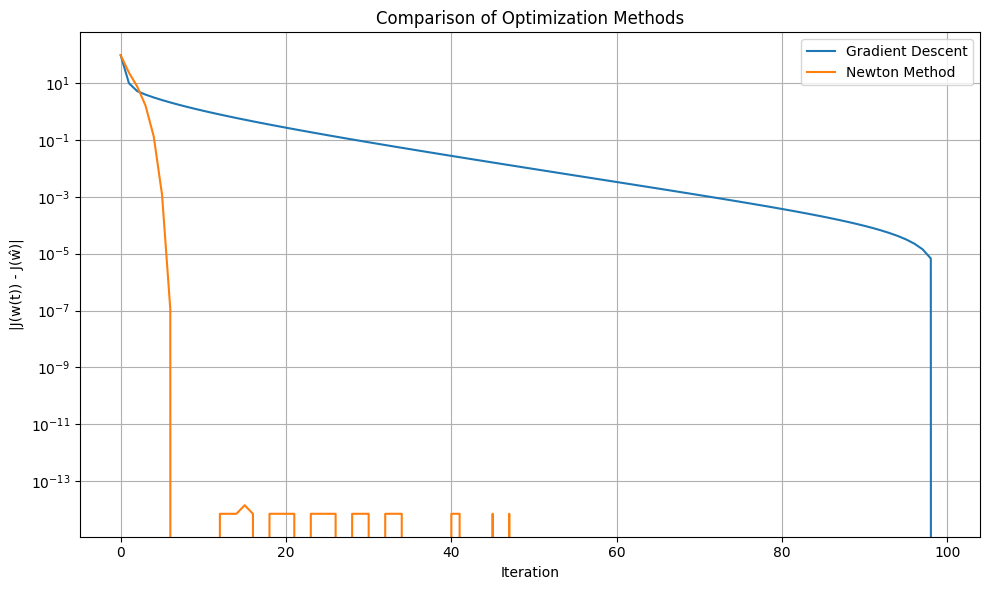

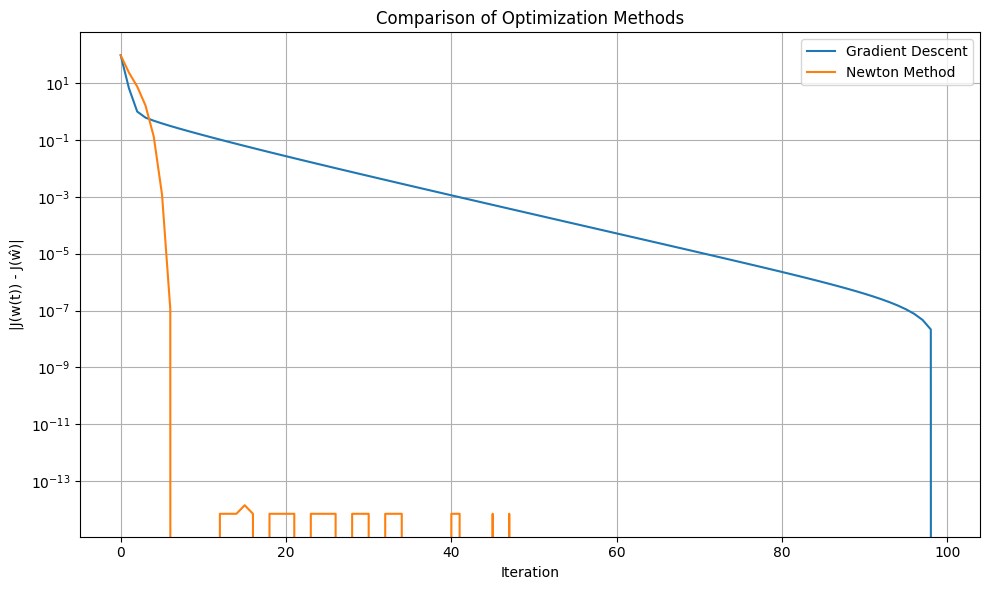

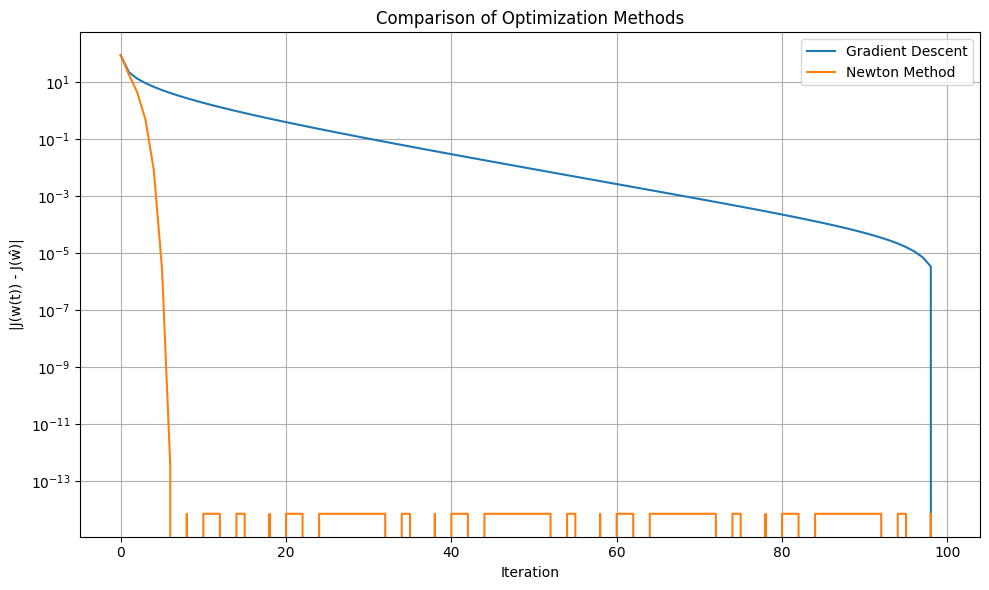

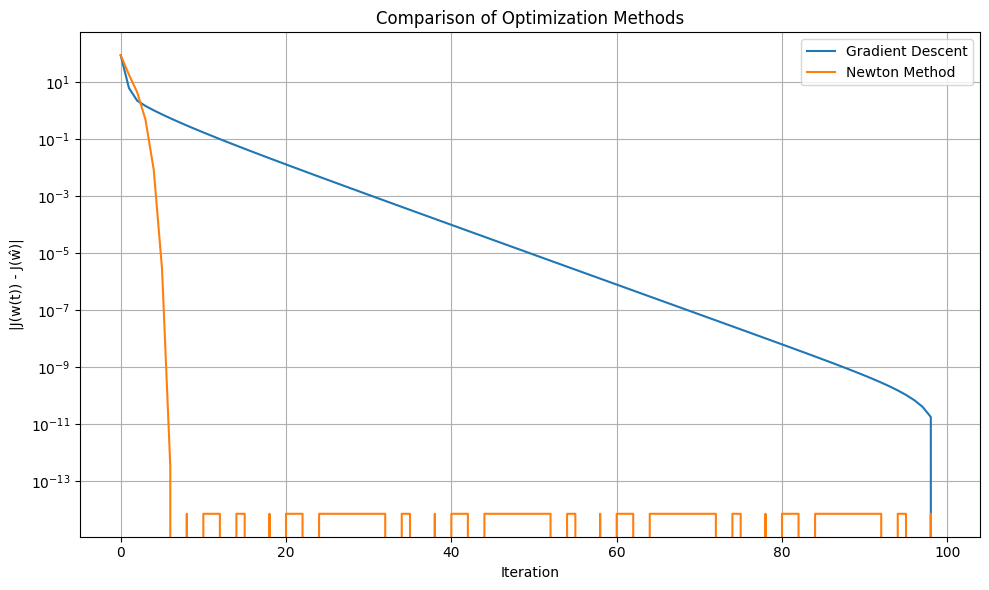

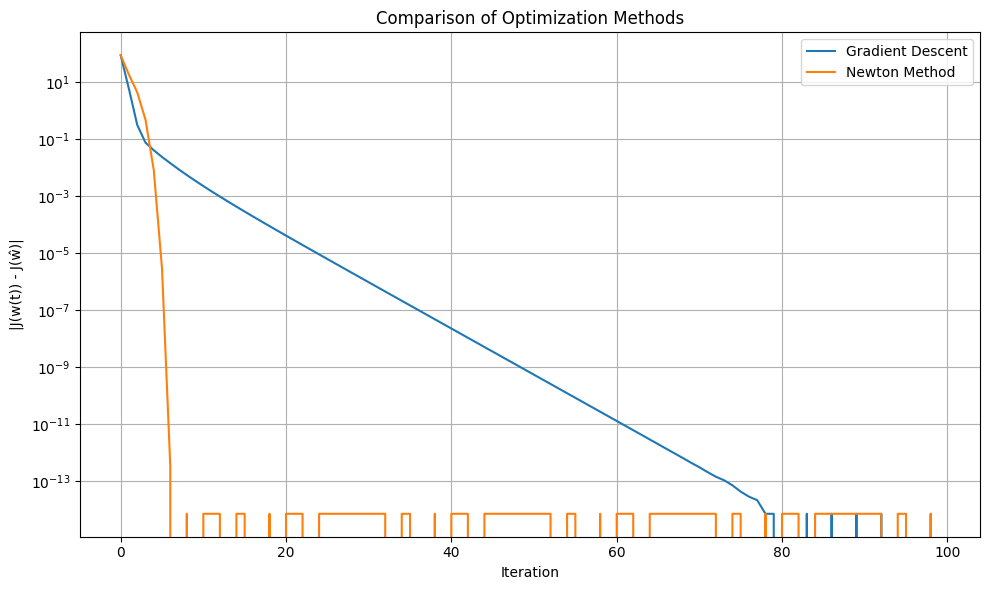

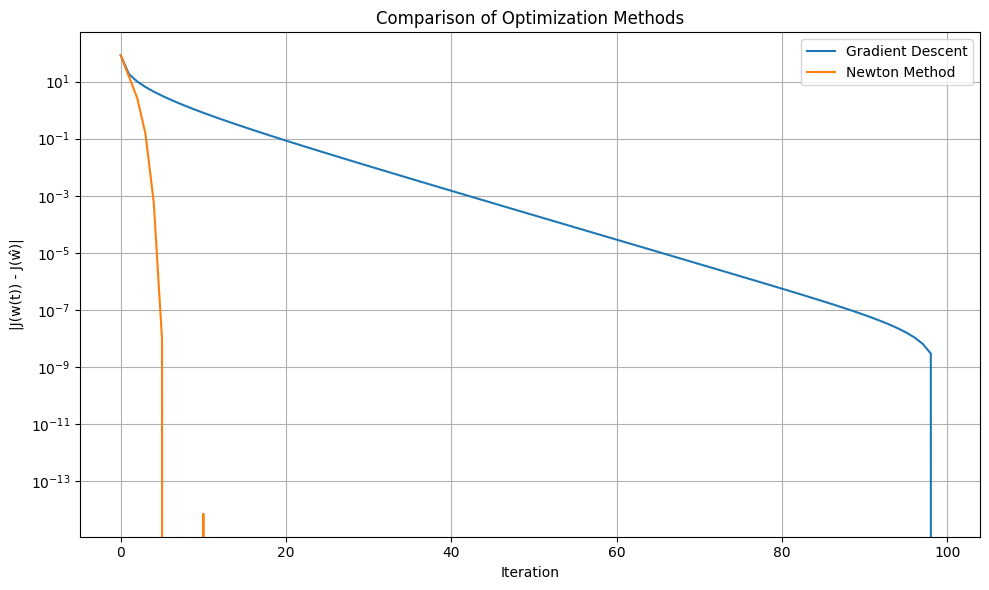

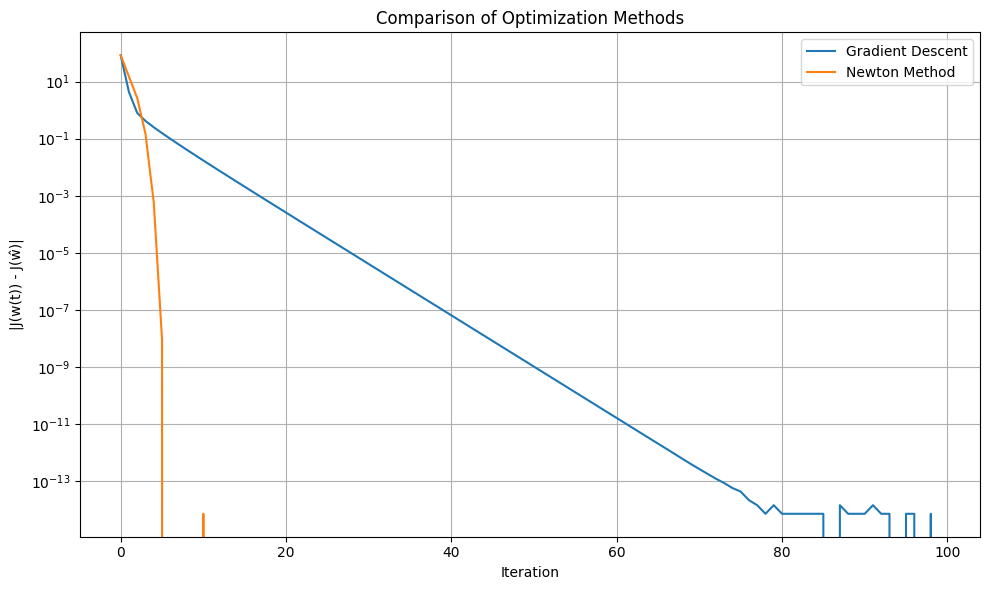

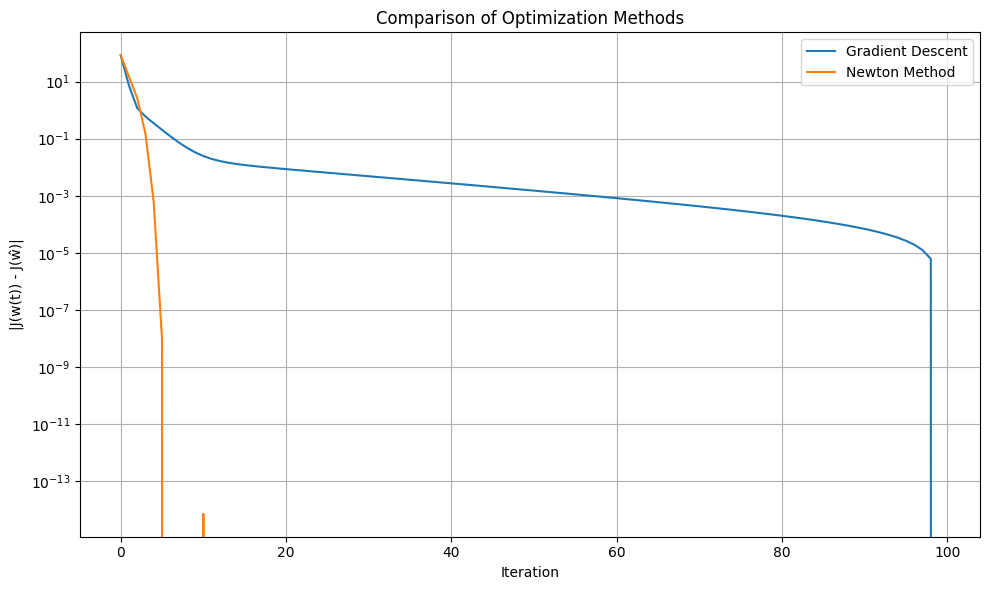

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset IV の作成
np.random.seed(0)
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
# y = (2 * x1 - 1 * x2 + 0.5 + noise > 0) でラベルを生成
noise = 0.5 * np.random.randn(n)
y = (2 * x[:, 0] - x[:, 1] + 0.5 + noise) > 0
y = 2 * y.astype(int) - 1  # {+1, -1}
x = np.hstack((x, np.ones((n, 1))))

# ロジスティック損失関数
def logistic_loss(w, X, y, lam):
    z = y * (X @ w)
    return np.sum(np.log(1 + np.exp(-z))) + (lam / 2) * np.dot(w, w)

# 勾配
def gradient(w, X, y, lam):
    z = y * (X @ w)
    p = 1 / (1 + np.exp(z))
    grad = -(X.T @ (y * p)) + lam * w
    return grad

# ヘッシアン
def hessian(w, X, y, lam):
    z = y * (X @ w)
    p = 1 / (1 + np.exp(z))
    D = np.diag(p * (1 - p))
    H = X.T @ D @ X + lam * np.eye(X.shape[1])
    return H

# バッチ最急降下法
def batch_gradient_descent(X, y, lam=0.1, eta=0.05, max_iter=100):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(max_iter):
        loss = logistic_loss(w, X, y, lam)
        losses.append(loss)
        grad = gradient(w, X, y, lam)
        w -= eta * grad
    return w, losses

# ニュートン法
def newton_method(X, y, lam=0.1, max_iter=100):
    w = np.zeros(X.shape[1])
    losses = []
    for _ in range(max_iter):
        loss = logistic_loss(w, X, y, lam)
        losses.append(loss)
        grad = gradient(w, X, y, lam)
        H = hessian(w, X, y, lam)
        w -= np.linalg.solve(H, grad)
    return w, losses

# 実行
# lam = 1
max_iter = 100
for lam in [0.1, 0.5, 1]:
	for eta in [0.025, 0.05, 0.075]:
		# バッチ最急降下法とニュートン法を実行
		w_gd, losses_gd = batch_gradient_descent(x, y, lam, eta=eta, max_iter=max_iter)
		w_nt, losses_nt = newton_method(x, y, lam, max_iter=max_iter)

		# 最小値（100回目の値）を基準に差分をプロット
		min_loss_gd = losses_gd[-1]
		min_loss_nt = losses_nt[-1]
		error_gd = [abs(l - min_loss_gd) for l in losses_gd]
		error_nt = [abs(l - min_loss_nt) for l in losses_nt]

		# 半対数プロット
		plt.figure(figsize=(10, 6))
		plt.semilogy(range(max_iter), error_gd, label='Gradient Descent')
		plt.semilogy(range(max_iter), error_nt, label='Newton Method')
		plt.xlabel('Iteration')
		plt.ylabel('|J(w(t)) - J(ŵ)|')
		plt.title('Comparison of Optimization Methods')
		plt.legend()
		plt.grid(True)
		plt.tight_layout()
		plt.show()
